### EMAT31530 Worksheet 4 Unsupervised Learning

In this worksheet we will explore the use of different clustering algorithms on data, and how we can utilize dimensionality reduction techinqiues to visualise data and the resulting clusters.

# Digits dataset

Can we visualise our data? This isn't so straightforward, as our data is 64-dimensional. Rarely will you be working with data in 2 dimensions (or 3) and thus can be directly visualised. There is, however, something we can do to work around that, which we will get to soon. However, ultimatately, while visualisation is useful, we often want to know how good our clusters are quantitatively. 

There are a number of different metrics for assessing the performance of a cluster. One that is often used is known as the 'normalised mutual information' (NMI) score.

The Normalized Mutual Information (NMI) can be viewed as a normalization of the mutual information to scale the results between 0 and 1, where 0 has no mutual information and 1 is perfect correlation. More concretely, NMI is defined as:

\begin{equation}
NMI = \frac{
2I(y, c)}{[H(y)+ H(c)]}
\end{equation}
where $y$ are the ground truth labels, $c$ are the cluster labels (cluster assignments for each point), $H$ measures the entropy, and $I$ is the mutual information between the ground truth labels and the cluster labels.

Larger values indicate a better clustering. If every datapoint was assigned to the correct cluster, then the NMI would be 1.

In [88]:
from sklearn import datasets
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [89]:
# this will visualise the image. note here that we 'reshape' the vector before displaying it. 
# this is because the image, which was originally 8x8 pixels, has been 'flattened' to a 64 dimensional vector.
print("Each digit is a vector of length %i" % len(X[0]))
reshaped_x0 = X[0].reshape(8, 8)
print("However, we can reshape it such that it is a %i x %i image, which we can view" % (reshaped_x0.shape[0], reshaped_x0.shape[1]))
px.imshow(reshaped_x0, binary_string=True)

Each digit is a vector of length 64
However, we can reshape it such that it is a 8 x 8 image, which we can view


#### K-Means

In [90]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
cluster_assignments = [str(i) for i in kmeans.labels_]

In [91]:
px.imshow(X[42].reshape(8, 8), binary_string=True,
         height=400, width=400)

In [93]:
from sklearn.metrics.cluster import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y, cluster_assignments)
print("The NMI score of this clustering is %f" % nmi)

The NMI score of this clustering is 0.746877


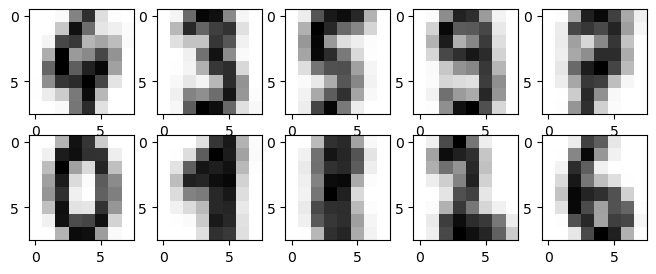

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, cmap=plt.cm.binary)

# Dimensionality reduction 

A common approach to visualising data, including after you have clustered it, is to use a dimensionality reduction method (such as PCA or tSNE) to reduce the higher dimensional data down to 2 dimensions and plot it.


### PCA

In [95]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

x = []
y = []
for row in X_new:
    x.append(row[0])
    y.append(row[1])

fig = px.scatter(x=x, y=y, color=cluster_assignments,
                width=800, height=600)

fig.update_traces(marker=dict(size=12),
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

### TSNE
As we know, PCA is linear, while TSNE is non-linear, which may be the reason why TNSE is finding much more interesting structure.
Let's try a new dataset, specifically one that may be more challenging for the k-means algorithm to perform well on.

In [96]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_new = tsne.fit_transform(X)

x = []
y = []
for row in X_new:
    x.append(row[0])
    y.append(row[1])

fig = px.scatter(x=x, y=y, color=cluster_assignments,
                width=700, height=500)

fig.update_traces(marker=dict(size=12),
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

/home/andre/miniconda3/envs/aura/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/andre/miniconda3/envs/aura/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



# Moons Dataset

In [97]:
from sklearn.datasets import make_moons
X, y = make_moons()
px.scatter(x=X[:,0], y=X[:,1])

#### K-Means



In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = [str(i) for i in kmeans.labels_]
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=labels);
fig.show()

#### DBSCAN


In [99]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN().fit(X)
labels = [str(i) for i in dbscan.labels_]
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=labels);
fig.show()

This is great, DBSCAN has correctly identified the two natural clusters in the data.

Note that we also didn't tell it how many clusters to find, DBSCAN automatically detects the number of clusters. This is controlled by some hyperparameters, specifically, eps (the neighbourhood size) and min_samples (the minimum number of samples required within a neighbourhood for a point to be a 'core point').

Let's see how these hyperparameters can alter the performance of DBSCAN on another dataset.

We will regenerate the same dataset as we used at the start of this worksheet.

# Blobs dataset

In [100]:
from sklearn.datasets import make_blobs
import plotly.express as px

X, y_true = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.45, random_state=0)
fig = px.scatter(x=X[:, 0], y=X[:, 1]);
fig.update_traces(marker=dict(size=12))

fig.show()

#### K-Means

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = [str(i) for i in kmeans.labels_]
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=labels);
fig.update_traces(marker=dict(size=12))
fig.show()

#### DBSCAN - no hyperparameters

In [102]:
dbscan = DBSCAN().fit(X)
labels = [str(i) for i in dbscan.labels_]
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=labels);
fig.update_traces(marker=dict(size=12))
fig.show()

#### DBSCAN - with hyperparameters

In [103]:
dbscan = DBSCAN(eps=1).fit(X)
labels = [str(i) for i in dbscan.labels_]
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=labels);
fig.update_traces(marker=dict(size=12))
fig.show()

Hopefully in your exploration of these two parameters you have realised how sensitive DBSCAN is two these parameters, specifically eps. This shows that there is no 'magic bullet' in unsupervised learning. While DBSCAN doesn't require the number of clusters in order to function (most popular clustering methods do, e.g., k-means), it does require some apriori knowledge of the data structure.